In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [3]:
playstore = pd.read_csv(r"D:\Data Analyst projects\Google PlayStore Project\googleplaystore.csv")

## Data Exploration

In [4]:
playstore.shape

(10841, 13)

In [72]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [73]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

In [9]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
playstore=playstore.dropna()

In [11]:
playstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
playstore.duplicated().sum()

474

In [13]:
playstore=playstore.drop_duplicates()

In [14]:
playstore.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 8886, dtype: bool

## Data Visualization

In [15]:
playstore["App"].value_counts()[0:20]

App
ROBLOX                                              9
8 Ball Pool                                         7
Bubble Shooter                                      6
Helix Jump                                          6
Zombie Catchers                                     6
Bowmasters                                          5
Candy Crush Saga                                    5
Temple Run 2                                        5
Subway Surfers                                      5
Duolingo: Learn Languages Free                      5
Granny                                              5
Angry Birds Classic                                 5
Farm Heroes Saga                                    5
Zombie Tsunami                                      5
slither.io                                          5
Hangouts                                            4
Google Photos                                       4
Viber Messenger                                     4
YouTube Kids            

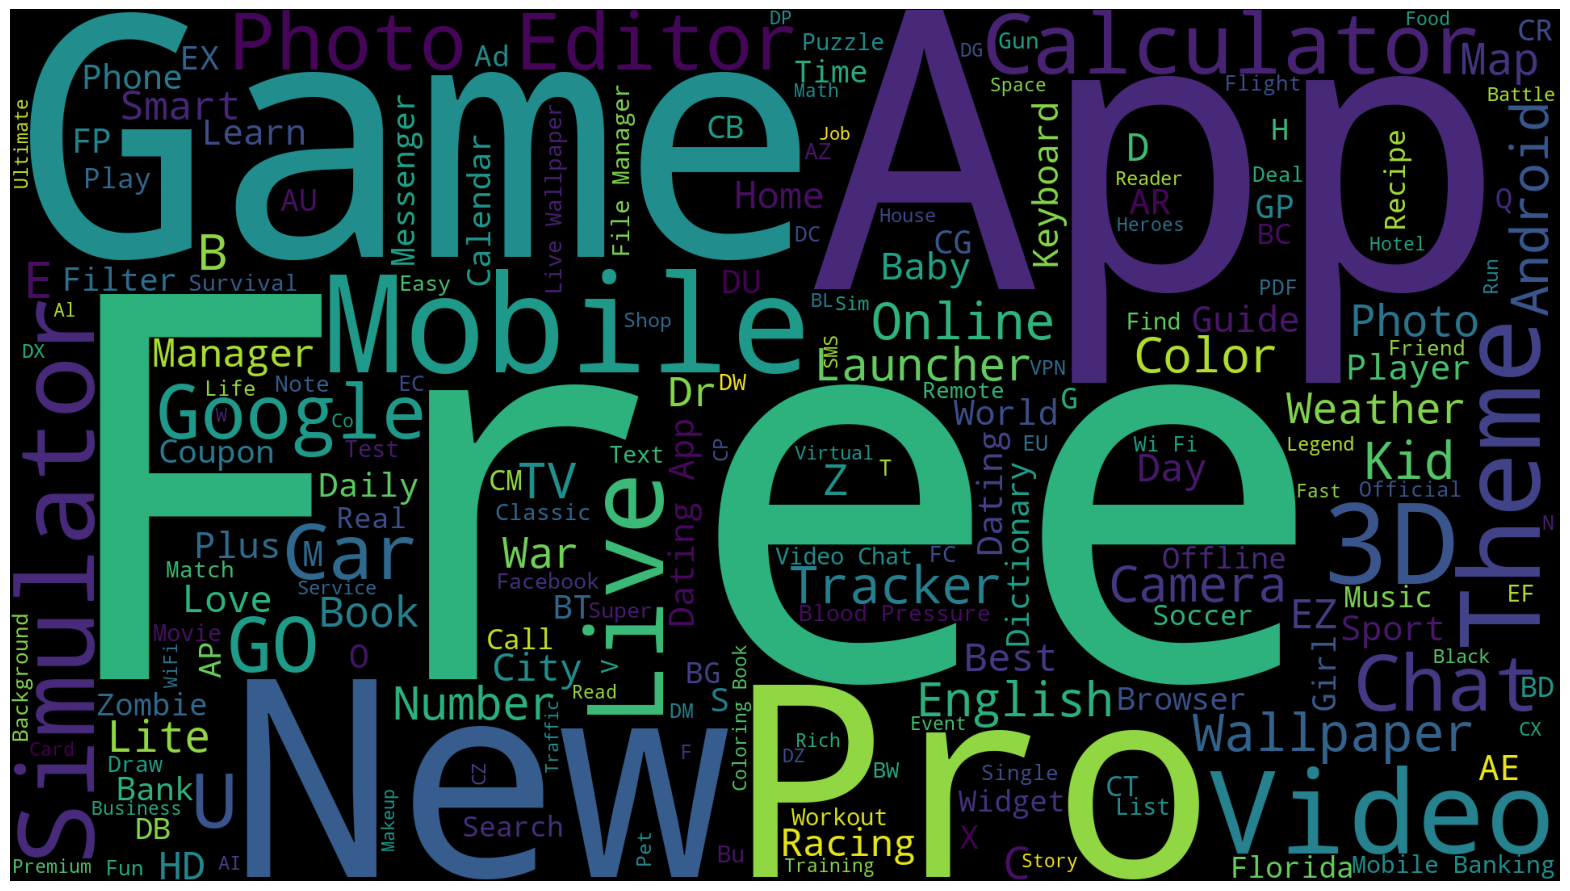

In [16]:
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
                        background_color="black",
                        width=1920,
                        height=1080
                      ).generate( " ".join(playstore.App))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\1515524827.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore[playstore["App"].isin(top_categories.index)]["App"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\1515524827.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore[playstore["App"].isin(top_categories.index)]["App"], palette=palette)


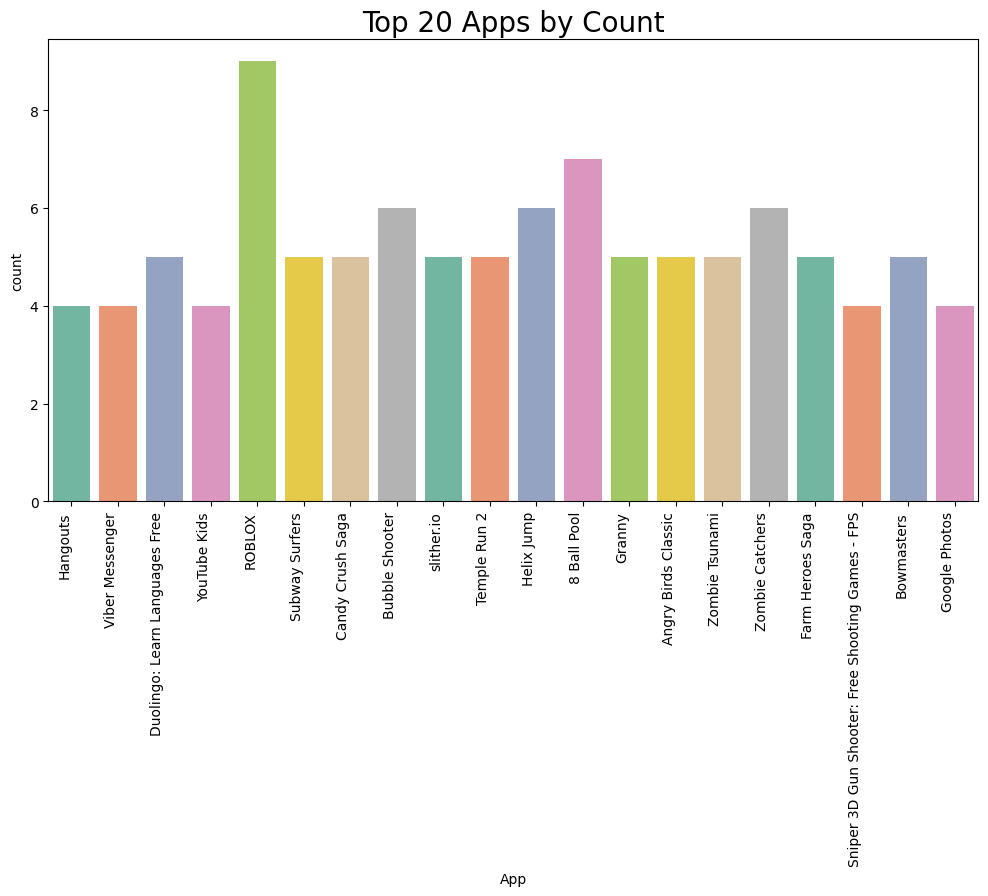

In [17]:
category_counts = playstore['App'].value_counts()
top_categories = category_counts.head(20)
plt.figure(figsize= (12,6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore[playstore["App"].isin(top_categories.index)]["App"], palette=palette)
plt.xticks(rotation=90, ha="right")
plt.title("Top 20 Apps by Count", fontsize=20)
plt.show()


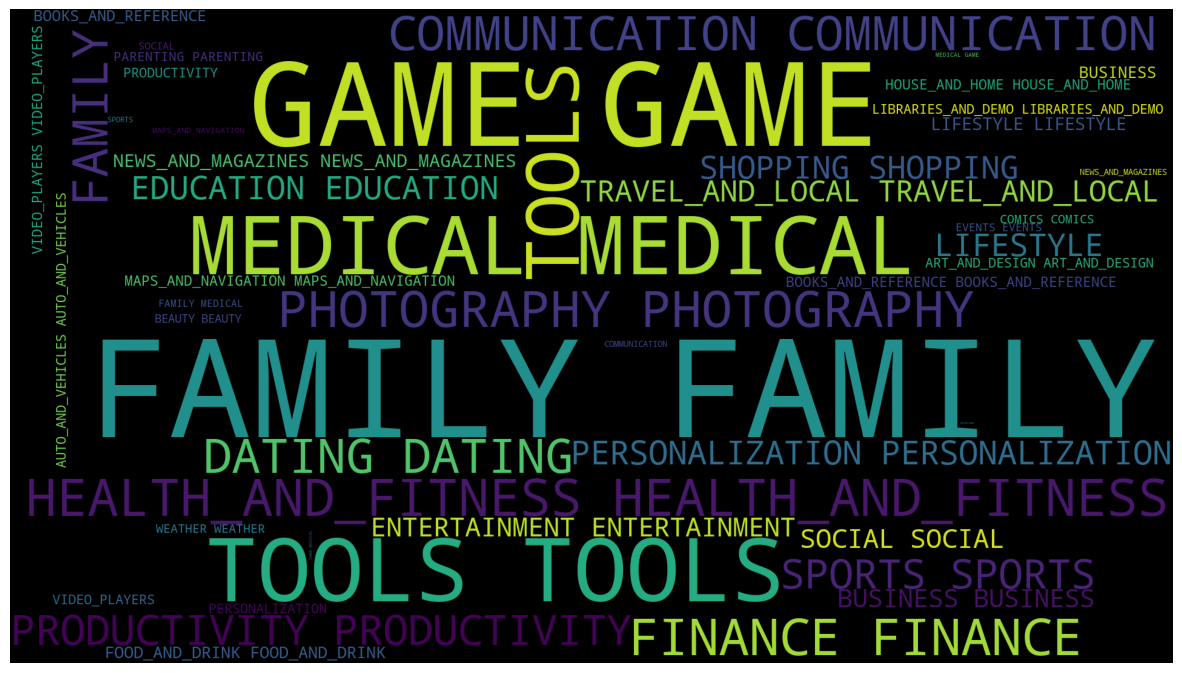

In [18]:
plt.subplots(figsize=(15,9))
wordcloud = WordCloud(
                      background_color="black",
                      width=1920,
                      height=1080,
                      ).generate(" ".join(playstore.Category))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
playstore["Category"].value_counts()

Category
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\582714660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore["Category"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\582714660.py:3: UserWarning: 
The palette list has fewer values (8) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore["Category"], palette=palette)


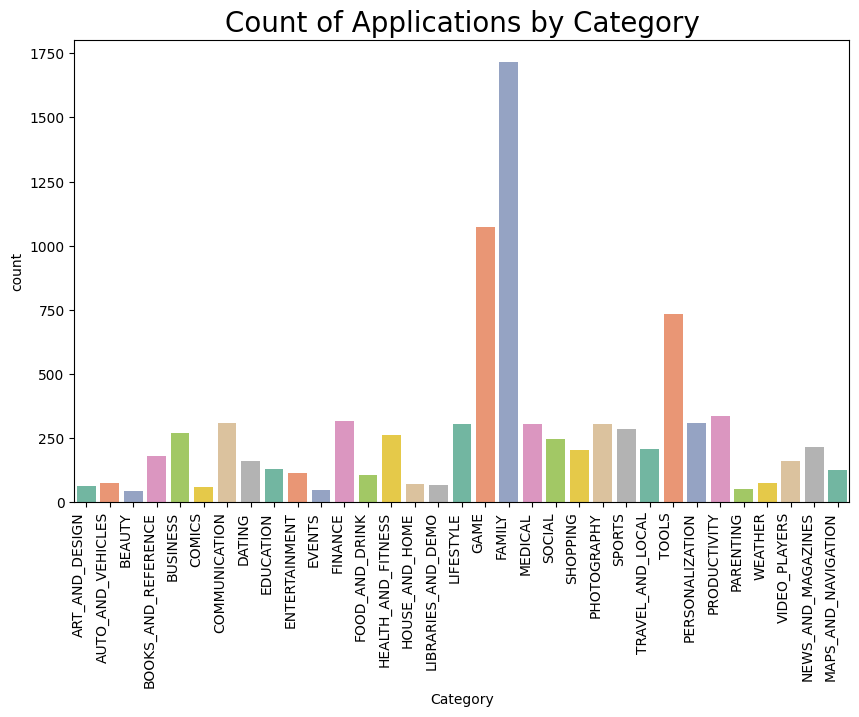

In [21]:
plt.figure(figsize=(10,6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore["Category"], palette=palette)
plt.title("Count of Applications by Category",fontsize=20)
plt.xticks(rotation=90, ha="right")
plt.show()

In [22]:
playstore['Rating'].value_counts()

Rating
4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\3995674852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore["Rating"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\3995674852.py:3: UserWarning: 
The palette list has fewer values (8) than needed (39) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore["Rating"], palette=palette)


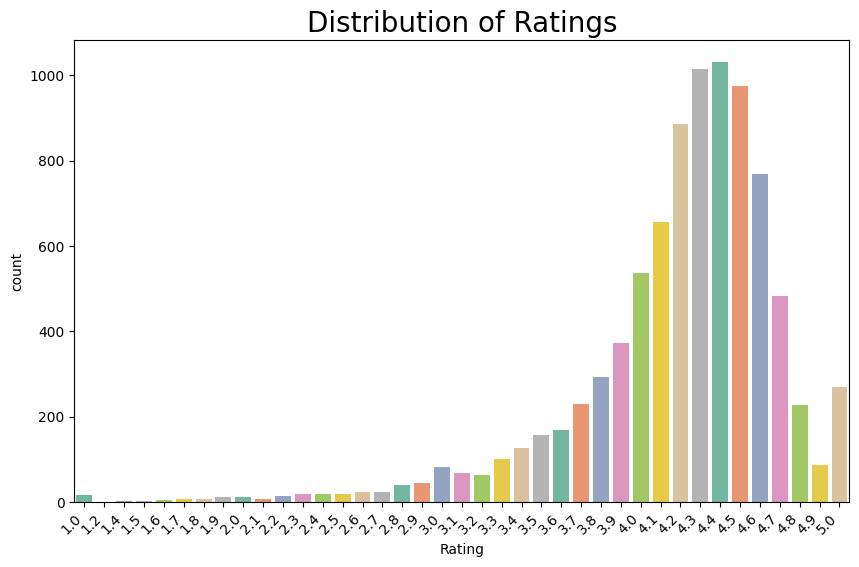

In [23]:
plt.figure(figsize=(10,6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore["Rating"], palette=palette)
plt.title("Distribution of Ratings", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\4270102060.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=user_top_apps, x="Rating", hue="App", kind="kde")


<Figure size 2000x1000 with 0 Axes>

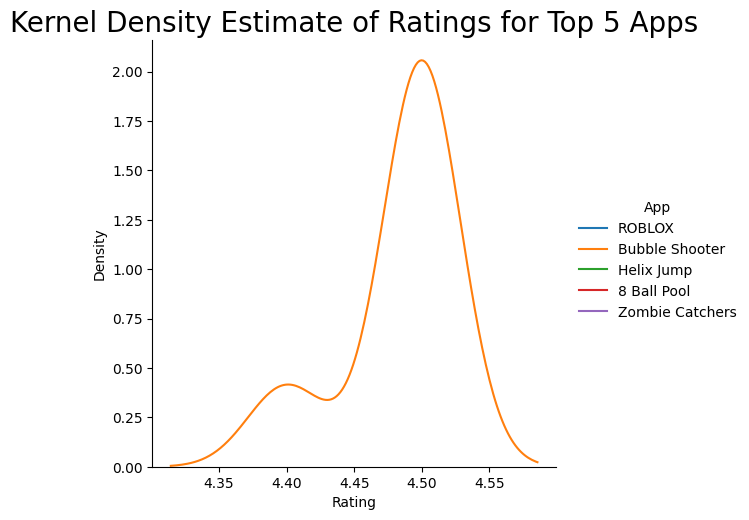

In [24]:
top_apps = playstore['App'].value_counts().nlargest(5).index
user_top_apps = playstore[playstore['App'].isin(top_apps)]
plt.figure(figsize=(20,10))
sns.displot(data=user_top_apps, x="Rating", hue="App", kind="kde")
plt.title("Kernel Density Estimate of Ratings for Top 5 Apps", fontsize=20)
plt.show()

In [25]:
playstore['Size'].value_counts()[0:20]

Size
Varies with device    1468
14M                    153
13M                    152
12M                    151
15M                    149
11M                    149
17M                    126
25M                    125
21M                    112
16M                    112
24M                    111
19M                    110
20M                    107
26M                    106
23M                     99
18M                     99
10M                     93
22M                     92
27M                     85
28M                     74
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\3286817379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore[playstore["Size"].isin(top_categories.index)]["Size"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\3286817379.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore[playstore["Size"].isin(top_categories.index)]["Size"], palette=palette)


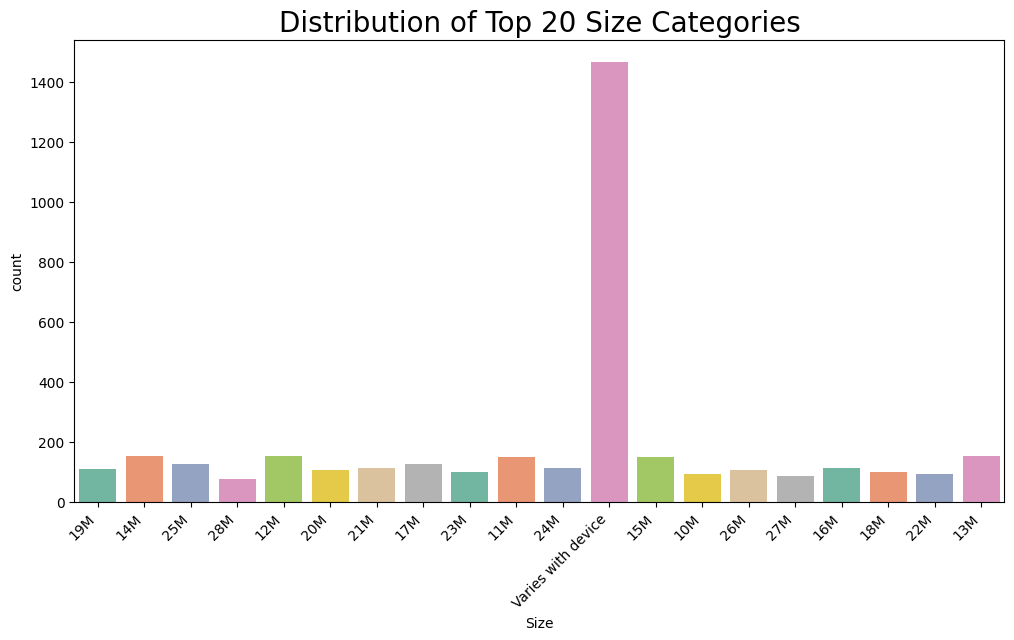

In [27]:
category_counts = playstore["Size"].value_counts()
top_categories = category_counts.head(20)
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore[playstore["Size"].isin(top_categories.index)]["Size"], palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Top 20 Size Categories",fontsize=20)
plt.show()

In [28]:
playstore['Installs'].value_counts()

Installs
1,000,000+        1485
10,000,000+       1132
100,000+          1110
10,000+            988
1,000+             697
5,000,000+         683
500,000+           515
50,000+            461
5,000+             425
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: count, dtype: int64

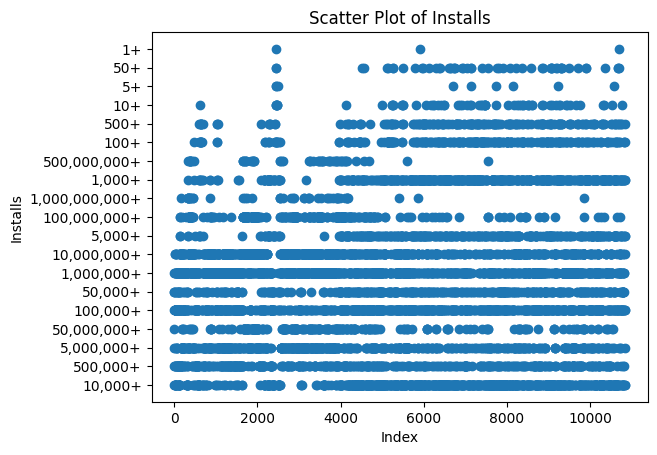

In [29]:
plt.scatter(playstore.index, playstore['Installs'])
plt.xlabel('Index')
plt.ylabel('Installs')
plt.title('Scatter Plot of Installs')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\2093210490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore["Installs"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\2093210490.py:3: UserWarning: 
The palette list has fewer values (8) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore["Installs"], palette=palette)


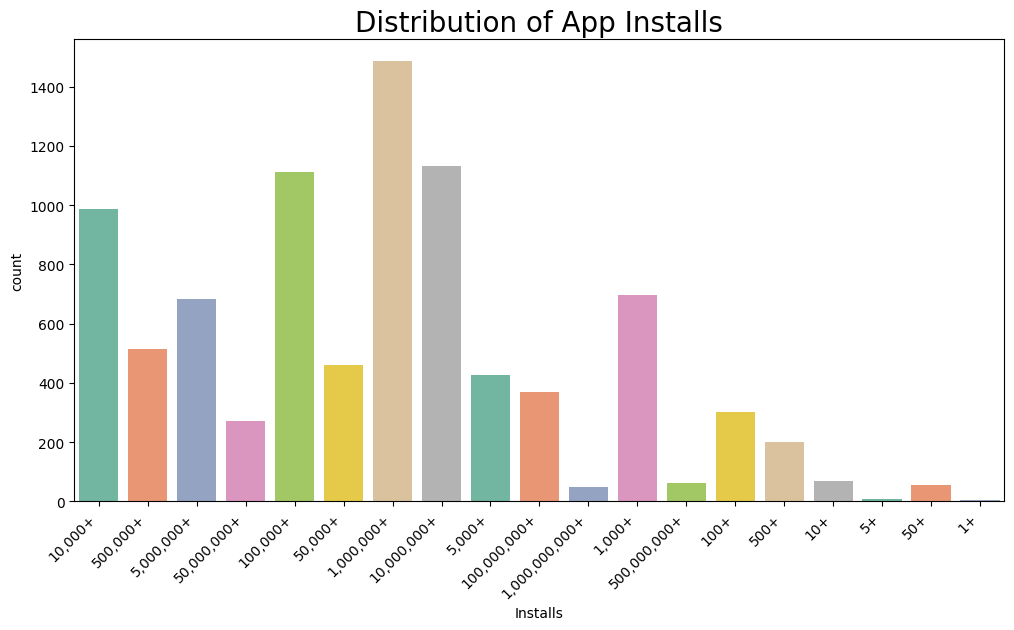

In [31]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore["Installs"], palette=palette)
plt.title("Distribution of App Installs",fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.show()

In [39]:
playstore['Type'].value_counts()

Type
Free    8275
Paid     611
Name: count, dtype: int64

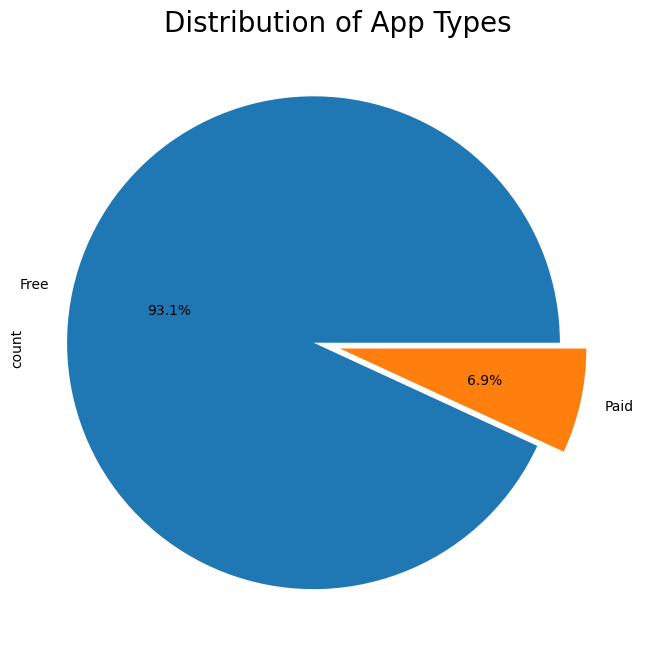

In [40]:
playstore["Type"].value_counts().plot.pie(figsize=(12,8),explode=(0.1, 0.01), autopct="%1.1f%%")
plt.title('Distribution of App Types', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution of App Types')

<Figure size 2000x1000 with 0 Axes>

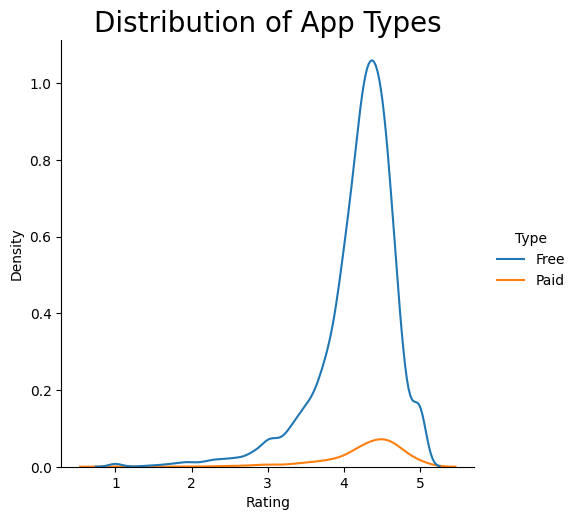

In [41]:
plt.figure(figsize=(20,10))

sns.displot(data=playstore, x="Rating", hue="Type", kind="kde")
plt.title("Distribution of App Types",fontsize=20)

In [42]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

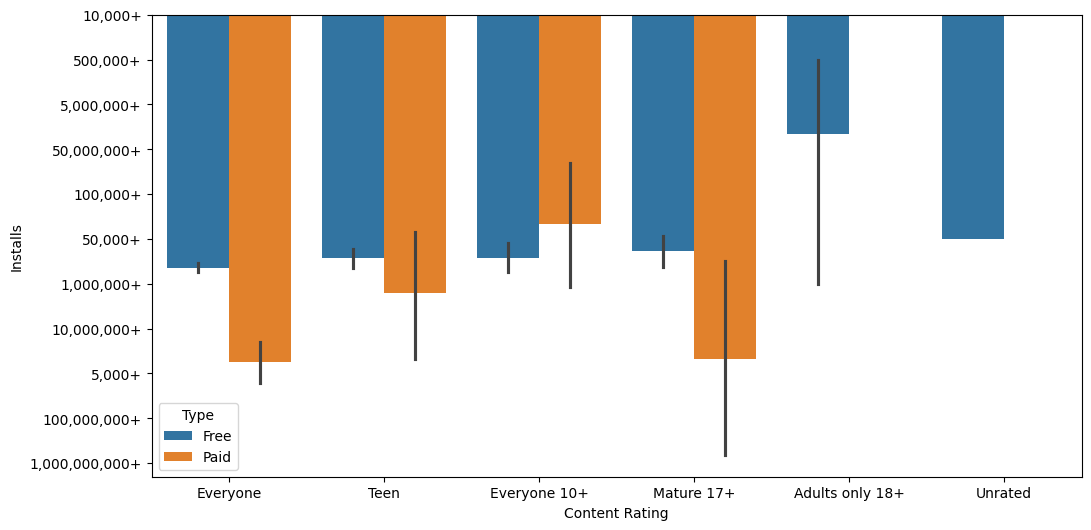

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=playstore)
plt.xlabel("Content Rating")
plt.ylabel("Installs")
plt.show()

In [64]:
playstore['Genres'].value_counts()[0:20]

Genres
Tools               732
Entertainment       498
Education           446
Action              349
Productivity        334
Finance             317
Personalization     308
Communication       307
Lifestyle           304
Photography         304
Medical             302
Sports              299
Business            270
Health & Fitness    262
Social              244
News & Magazines    214
Arcade              205
Travel & Local      204
Shopping            202
Simulation          193
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\1095276427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=playstore[playstore["Genres"].isin(top_categories.index)]["Genres"], palette=palette)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\1095276427.py:5: UserWarning: 
The palette list has fewer values (8) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=playstore[playstore["Genres"].isin(top_categories.index)]["Genres"], palette=palette)


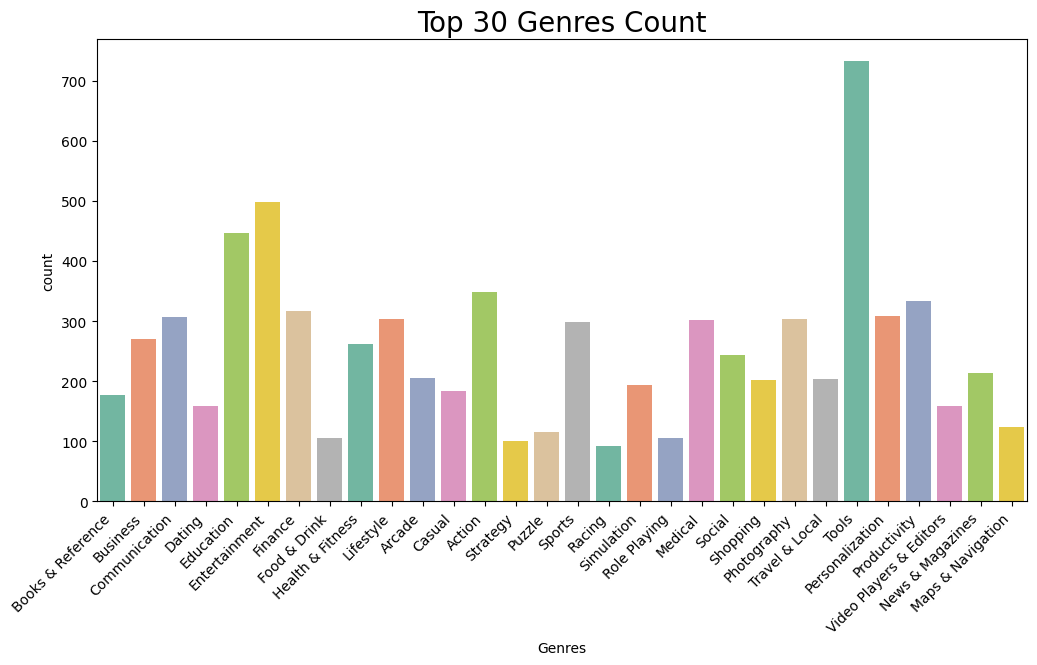

In [66]:
category_counts = playstore["Genres"].value_counts()
top_categories = category_counts.head(30)
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2")
sns.countplot(x=playstore[playstore["Genres"].isin(top_categories.index)]["Genres"], palette=palette)
plt.xticks(rotation=45, ha="right")
plt.title("Top 30 Genres Count",fontsize=20)
plt.show()

In [67]:
playstore['Content Rating'].value_counts()

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9900\478913075.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=playstore, x="Rating", hue="Content Rating", kind="kde")


Text(0.5, 1.0, 'Kernel Density Estimate of Ratings by Content Rating')

<Figure size 2000x1000 with 0 Axes>

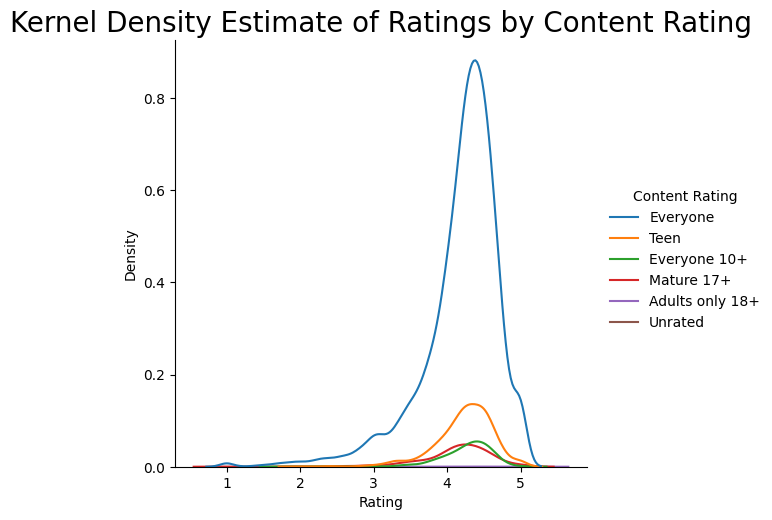

In [68]:
plt.figure(figsize=(20,10))
sns.displot(data=playstore, x="Rating", hue="Content Rating", kind="kde")
plt.title("Kernel Density Estimate of Ratings by Content Rating",fontsize=20)

In [75]:
playstore["Android Ver"].value_counts()

Android Ver
4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [76]:
playstore["Current Ver"].value_counts()

Current Ver
Varies with device    1258
1.0                    451
1.1                    190
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

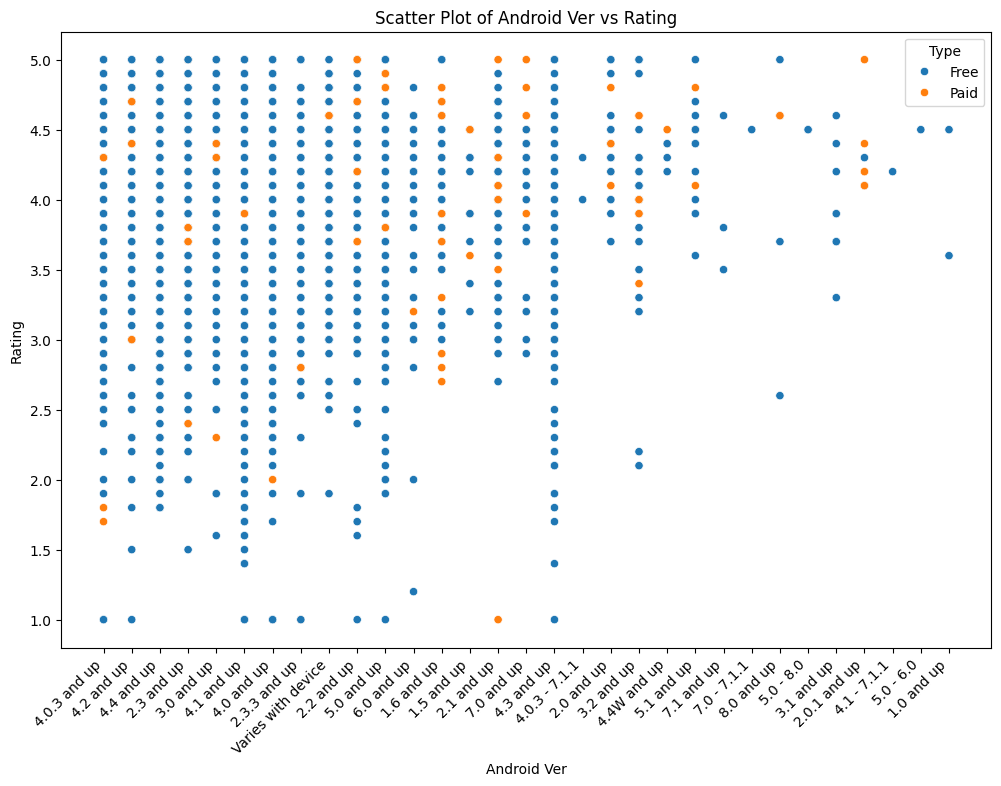

In [77]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.scatterplot(data=playstore, x="Android Ver", y="Rating", hue="Type")
plt.title(f'Scatter Plot of {"Android Ver"} vs {"Rating"}')
plt.xlabel("Android Ver")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

In [78]:
playstore['Last Updated'].value_counts()

Last Updated
August 3, 2018      291
July 31, 2018       254
August 2, 2018      250
August 1, 2018      247
July 30, 2018       183
                   ... 
April 17, 2014        1
April 11, 2016        1
October 27, 2015      1
August 31, 2015       1
March 23, 2014        1
Name: count, Length: 1299, dtype: int64

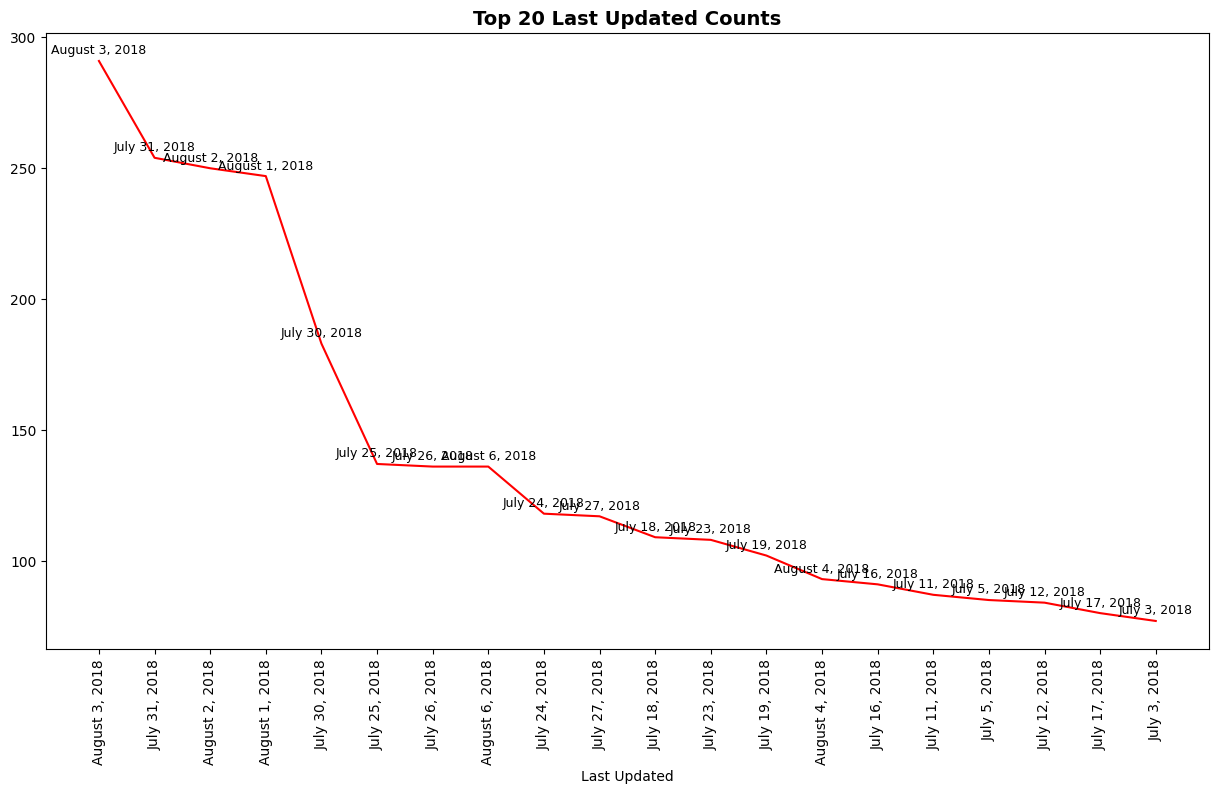

In [79]:
plt.figure(figsize=(15, 8))

sns.lineplot(x=playstore['Last Updated'].value_counts().head(20).index,
             y=playstore['Last Updated'].value_counts().head(20).values,
             alpha=1, color="r")

for i, txt in enumerate(playstore['Last Updated'].value_counts().head(20).index):
    plt.annotate(txt, (playstore['Last Updated'].value_counts().head(20).index[i],
                       playstore['Last Updated'].value_counts().head(20).values[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)
plt.xticks(rotation=90)
plt.title('Top 20 Last Updated Counts', fontsize=14, fontweight='heavy')
plt.show()